In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('diabetes_risk_prediction_dataset.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
data.replace({'Yes':1, 'No':0}, inplace= True)

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [5]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [6]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [7]:
x = data.drop('class', axis=1)
y = data['class']

In [9]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
data['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=23)

In [13]:
x_test.shape, x_train.shape

((104, 16), (416, 16))

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
model.score(x_train,y_train)

0.9375

In [16]:
model.score(x_test, y_test)

0.9134615384615384

In [17]:
y_pred = model.predict(x_test)

In [18]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

,True Values,Predicted Values
213,Negative,Negative
233,Negative,Negative
377,Negative,Negative
146,Positive,Positive
45,Positive,Positive
...,...,...
394,Negative,Negative
108,Positive,Positive
411,Negative,Negative
258,Positive,Positive


### Accuracy Score

In [19]:
accuracy_score(y_test, y_pred)

0.9134615384615384

### Confusion Matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  6],
       [ 3, 52]], dtype=int64)

Text(50.722222222222214, 0.5, 'True values')

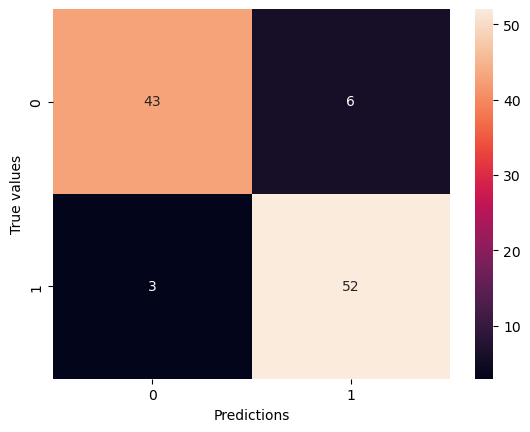

In [21]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predictions')
plt.ylabel('True values')

### Classification Report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.93      0.88      0.91        49
    Positive       0.90      0.95      0.92        55

    accuracy                           0.91       104
   macro avg       0.92      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104

